In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack, hstack
import fitsio

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

----
## South

In [15]:
sweep_dir = '/global/project/projectdirs/cosmo/data/legacysurvey/dr8/south/sweep/8.0'
sweep_paths_all = sorted(glob.glob(os.path.join(sweep_dir, '*.fits')))

In [16]:
sweep_paths = []
for sweep_path in sweep_paths_all:

    brick = sweep_path[-20:-5]
    ramin = float(brick[0:3])
    ramax = float(brick[8:11])
    decmin = float(brick[4:7])
    decmax = float(brick[-3:])
    if brick[3]=='m':
        decmin = -decmin
    if brick[-4]=='m':
        decmax = -decmax

    if (ramin>=140) and (ramax<=240) and (decmin>=0) and (decmax<=30):
        sweep_paths.append(sweep_path)

print(len(sweep_paths))

60


In [17]:
gaia_columns = ['RA', 'DEC', 'PHOT_G_MEAN_MAG', 'PHOT_BP_MEAN_MAG', 'PHOT_RP_MEAN_MAG']
cat = []
for sweep_path in sweep_paths:
    tmp = fitsio.read(sweep_path, columns=['GAIA_PHOT_G_MEAN_MAG', 'GAIA_PHOT_BP_MEAN_MAG', 'GAIA_PHOT_RP_MEAN_MAG'])
    mask = (tmp['GAIA_PHOT_G_MEAN_MAG']!=0) & (tmp['GAIA_PHOT_BP_MEAN_MAG']!=0) & (tmp['GAIA_PHOT_RP_MEAN_MAG']!=0)
    mask &= (tmp['GAIA_PHOT_G_MEAN_MAG']>16) & (tmp['GAIA_PHOT_G_MEAN_MAG']<18)
    n0 = np.sum(mask)
    mask &= (tmp['GAIA_PHOT_BP_MEAN_MAG']-tmp['GAIA_PHOT_RP_MEAN_MAG']<0) | (tmp['GAIA_PHOT_BP_MEAN_MAG']-tmp['GAIA_PHOT_RP_MEAN_MAG']>3)
    idx = np.where(mask)[0]
    print(len(idx), '{:.2f}%'.format(len(idx)/n0*100))
    if len(idx)>0:
        tmp = fitsio.read(sweep_path, rows=idx)
        tmp = Table(tmp)
        cat.append(tmp)
cat = vstack(cat)
print(len(cat))

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in less
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in greater


221 0.58%
178 0.53%
208 0.69%
165 0.60%
188 0.75%
155 0.68%
201 0.67%
180 0.67%
171 0.70%
179 0.79%
171 0.83%
179 0.92%
193 0.72%
186 0.77%
185 0.85%
154 0.75%
147 0.78%
168 0.96%
182 0.71%
153 0.66%
166 0.79%
174 0.88%
142 0.79%
123 0.74%
183 0.70%
171 0.72%
155 0.72%
167 0.85%
186 1.02%
157 0.94%
204 0.72%
187 0.73%
180 0.78%
204 0.90%
162 0.85%
141 0.79%
221 0.69%
203 0.71%
174 0.67%
169 0.73%
180 0.85%
179 0.82%
213 0.56%
207 0.61%
186 0.62%
161 0.59%
195 0.81%
172 0.74%
273 0.52%
227 0.53%
179 0.48%
209 0.62%
172 0.58%
175 0.64%
272 0.40%
250 0.42%
239 0.46%
222 0.50%
223 0.57%
199 0.56%
11166


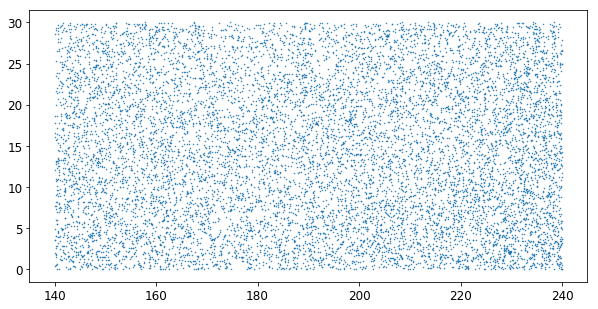

0.632724341752
0.631828765896
0.623499910442
6962


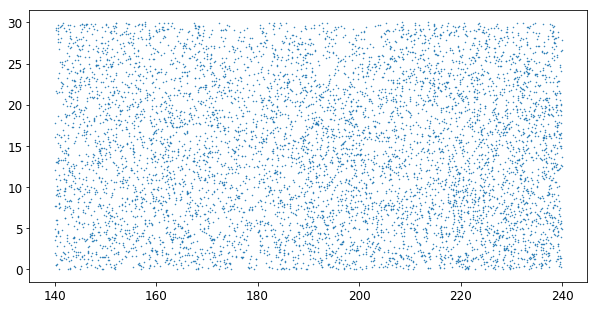

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(cat['RA'], cat['DEC'], '.', ms=1)
plt.show()

mask = (cat['MASKBITS']==0)
print(np.sum(mask)/len(mask))
mask &= cat['TYPE']=='PSF '
print(np.sum(mask)/len(mask))
mask &= cat['FRACFLUX_R']<0.1
print(np.sum(mask)/len(mask))
print(np.sum(mask))

cat = cat[mask]
plt.figure(figsize=(10, 5))
plt.plot(cat['RA'], cat['DEC'], '.', ms=1)
plt.show()

In [ ]:
cat.write('/global/cscratch1/sd/rongpu/dr8/misc/dr8_south_gaia_reddest_and_bluest.fits')

----
## North

In [6]:
sweep_dir = '/global/project/projectdirs/cosmo/data/legacysurvey/dr8/north/sweep/8.0'
sweep_paths_all = sorted(glob.glob(os.path.join(sweep_dir, '*.fits')))

In [7]:
sweep_paths = []
for sweep_path in sweep_paths_all:

    brick = sweep_path[-20:-5]
    ramin = float(brick[0:3])
    ramax = float(brick[8:11])
    decmin = float(brick[4:7])
    decmax = float(brick[-3:])
    if brick[3]=='m':
        decmin = -decmin
    if brick[-4]=='m':
        decmax = -decmax

    # if (ramin>=100) and (ramax<=280) and (decmin>=30) and (decmax<=80):
    if (decmin>=30) and (decmax<=80):
        sweep_paths.append(sweep_path)

print(len(sweep_paths))

219


In [8]:
gaia_columns = ['RA', 'DEC', 'PHOT_G_MEAN_MAG', 'PHOT_BP_MEAN_MAG', 'PHOT_RP_MEAN_MAG']
cat = []
for sweep_path in sweep_paths:
    tmp = fitsio.read(sweep_path, columns=['GAIA_PHOT_G_MEAN_MAG', 'GAIA_PHOT_BP_MEAN_MAG', 'GAIA_PHOT_RP_MEAN_MAG'])
    mask = (tmp['GAIA_PHOT_G_MEAN_MAG']!=0) & (tmp['GAIA_PHOT_BP_MEAN_MAG']!=0) & (tmp['GAIA_PHOT_RP_MEAN_MAG']!=0)
    mask &= (tmp['GAIA_PHOT_G_MEAN_MAG']>16) & (tmp['GAIA_PHOT_G_MEAN_MAG']<18)
    n0 = np.sum(mask)
    mask &= (tmp['GAIA_PHOT_BP_MEAN_MAG']-tmp['GAIA_PHOT_RP_MEAN_MAG']<0) | (tmp['GAIA_PHOT_BP_MEAN_MAG']-tmp['GAIA_PHOT_RP_MEAN_MAG']>3)
    idx = np.where(mask)[0]
    print(len(idx), '{:.2f}%'.format(len(idx)/n0*100))
    if len(idx)>0:
        tmp = fitsio.read(sweep_path, rows=idx)
        tmp = Table(tmp)
        cat.append(tmp)
cat = vstack(cat)
print(len(cat))

5 0.25%
0 0.00%
0 nan%


/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in less
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in greater
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in long_scalars


8 0.19%
8 0.16%
12 0.14%
8 0.18%
2 0.28%
0 nan%
3 0.04%
56 0.14%
63 0.11%
120 0.18%
112 0.19%
136 0.19%
123 0.28%
102 0.29%
16 0.28%
22 0.25%
165 0.14%
199 0.18%
165 0.19%
165 0.23%
150 0.26%
158 0.34%
112 0.31%
98 0.34%
76 0.37%
56 0.36%
173 0.24%
165 0.28%
175 0.35%
149 0.35%
129 0.35%
127 0.40%
117 0.44%
85 0.39%
79 0.44%
43 0.32%
160 0.40%
169 0.47%
154 0.48%
146 0.51%
115 0.45%
130 0.57%
100 0.50%
76 0.43%
75 0.50%
52 0.44%
172 0.62%
143 0.56%
157 0.67%
119 0.56%
117 0.59%
112 0.63%
98 0.62%
88 0.61%
54 0.43%
55 0.53%
153 0.71%
143 0.72%
148 0.79%
109 0.62%
134 0.82%
124 0.82%
87 0.63%
92 0.74%
44 0.40%
36 0.37%
129 0.72%
117 0.69%


KeyboardInterrupt: 

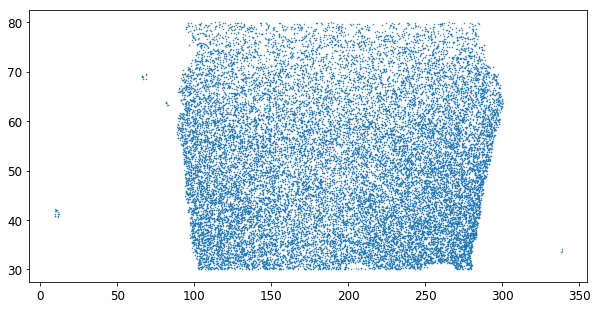

0.19859947702
0.197624429376
0.194522005053
0.158223640473
3570


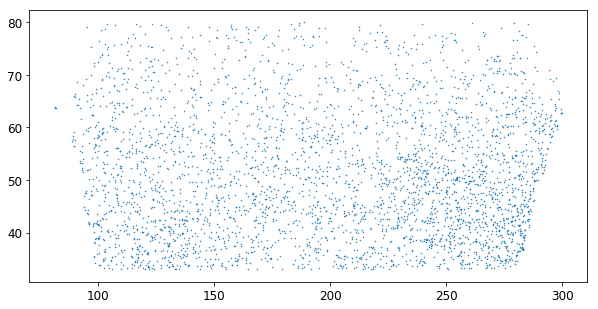

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(cat['RA'], cat['DEC'], '.', ms=1)
plt.show()

mask = (cat['MASKBITS']==0)
print(np.sum(mask)/len(mask))
mask &= cat['TYPE']=='PSF '
print(np.sum(mask)/len(mask))
mask &= cat['FRACFLUX_R']<0.1
print(np.sum(mask)/len(mask))
mask &= (cat['RA']>80) & (cat['RA']<300) & (cat['DEC']>33)
print(np.sum(mask)/len(mask))
print(np.sum(mask))

cat = cat[mask]
plt.figure(figsize=(10, 5))
plt.plot(cat['RA'], cat['DEC'], '.', ms=1)
plt.show()

In [19]:
mask = (cat['FLUX_G']>0) & (cat['FLUX_R']>0) & (cat['FLUX_Z']>0)
print(np.sum(mask)/len(mask))
cat = cat[mask]

0.981512605042


In [21]:
cat.write('/global/cscratch1/sd/rongpu/dr8/misc/dr8_north_gaia_reddest_and_bluest.fits')